---
title: Prediction intervals
toc: true
toc_sticky: true
---

prediction interval

Confidence interval

tolerance interval

     



In [1]:
# Load packages for coding examples
import pandas as pd
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm

Let's imagine that there are only two types of hitters in MLB, those with a true talent 10% hit rate and those with a true talent 25% hit rate. We also know that 60% of MLB hitters are in the 10% hit rate group and the remaining 40% are in the 25% hit rate group. Suppose we have observed a hitter, Bobby Aguila, over 100 plate appearances and he has hit at an 18% rate. What is the probability that Aguila has a true talent level of 10% hit rate?

Bayes' theorem can be applied here but it may take a little more digging to see it. Let's create some notations before we get started.

T10 = true talent 10% hit group
<br>
T25 = true talent 25% hit group
<br>
18H = 18 hits in 100 at-bats

The original question could be phrased as "What is the probability that Aguila has a true talent level of 10% hit rate, given that he has 18 hits in 100 at-bats?"

In Bayes' theorem, we can therefore structure our equation like this:

$\text{P}(\text{T10} | \text{18H}) = \frac{\text{P}(\text{18H} | \text{T10})\text{P}(\text{T10})}{\text{P}(\text{18H})}$


But what if we weren't asking for a single probability if Aguila was in the 10% hit rate group versus the 25% hit group? With just two groups, we have a pretty simple prior distribution. Essentially, the prior in that example was a Bernoulli distribution since the probability of being in one group *p* is *(1-p)* of being in the other group. More specifically, we were only interested in one of those groups (the 10% group) of the Bernoulli. A more realistic question would be to use a prior distribution that encapsulates a *range* of talent levels and then ask where would we expect Aguila's batting average (hitting rate) be within that range. This also exposes us to the concept of a credible interval.

By the way, there is a [superb and much better post](http://varianceexplained.org/r/credible_intervals_baseball/) on credible intervals. That post also happens to use baseball statistics. My post is building on my previous example.

Let's take these steps in a couple of iterations. First, let's take the original Bernoulli distribution example and show how the prior distribution gets updated with data to produce the posterior distribution.

# Showing the posterior distribution results from the prior and the data

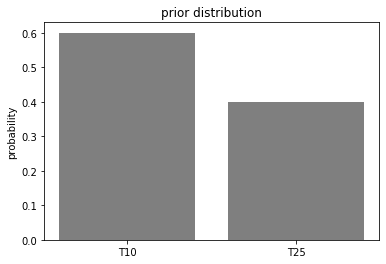

In [2]:
f, ax1 = plt.subplots()

ax1.bar([0, 1], [0.6, 0.4], color='k', alpha=0.5)
ax1.set_xticks([0,1])
ax1.set_xticklabels(['T10', 'T25'])
ax1.set_ylabel('probability')
ax1.set_title('prior distribution');

Now let's add in the data of 18 hits in 100 at-bats.

In [3]:
# T10 group
n, p10 = 100, 0.1
rv10 = binom(n, p10)

# T25 group
n, p25 = 100, 0.25
rv25 = binom(n, p25)

In [4]:
posterior_p10 = (rv10.pmf(18) * 0.6) / ((rv10.pmf(18) * 0.6) + (rv25.pmf(18) * 0.4))
posterior_p25 = (rv25.pmf(18) * 0.4) / ((rv10.pmf(18) * 0.6) + (rv25.pmf(18) * 0.4))
print("Posterior probability for T10 group: {0:0.4f}".format(posterior_p10))
print("Posterior probability for T25 group: {0:0.4f}".format(posterior_p25))

Posterior probability for T10 group: 0.2428
Posterior probability for T25 group: 0.7572


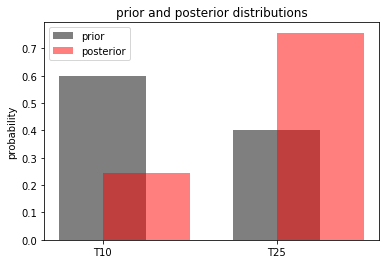

In [5]:
f, ax1 = plt.subplots()
ax1.bar([0, 1], [0.6, 0.4], width=0.5, color='k', alpha=0.5, label='prior')
ax1.bar([0.25, 1.25], [posterior_p10, posterior_p25], width=0.5, color='r', alpha=0.5, label='posterior')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['T10', 'T25'])
ax1.set_ylabel('probability')
ax1.set_title('prior and posterior distributions')
ax1.legend();

Note how even though we calculated the posterior values for both, we could have easily just taken 1 - the probability of the T25 group.

# Using a more realistic prior distribution

## Gaussian (and why it doesn't apply here)

Instead of saying that a 10% hit rate and a 25% hit rate are the only values that we can work with, let's say that we have a Gaussian distribution where those two values mark the bottom and top 5%, respectively.

In [50]:
mu = (.25-0.1)/2 + 0.1   # midpoint between the two
sd = (.25-mu)/1.96       # standard deviation based on .10 and .25 being at bottom and top 5% respectively

dist = norm(mu, sd)

In [73]:
mu

0.175

Text(0.5, 1.0, 'prior')

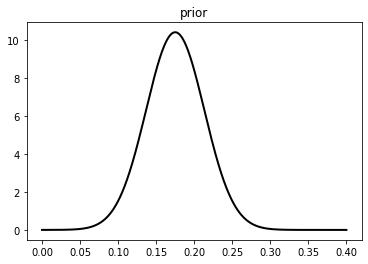

In [66]:
x = np.linspace(0, 0.4, 1000)
y = dist.pdf(x)
 
f, ax1 = plt.subplots()
ax1.plot(x, dist.pdf(x), 'k-', lw=2, label='frozen pdf')
ax1.set_title('prior')

I immediately realized that the Gaussian is not the appropriate prior distribution to use because it is not "conjugate" to the binomial, meaning they're not in the same family.

## Beta distribution

In [7]:
mu = (.25-0.1)/2 + 0.1   # midpoint between the two

total_ab = 75
a = round(mu*total_ab)
b = total_ab-a
print("a, b values: ", a, b)

a, b values:  13 62


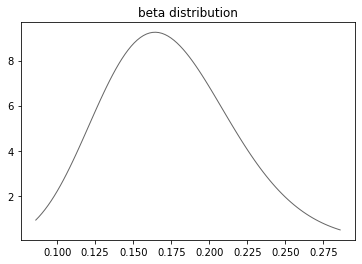

In [8]:
f, ax1 = plt.subplots()

x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)

ax1.plot(x, beta.pdf(x, a, b),
         'k-', lw=1, alpha=0.6, label='beta pdf')
ax1.set_title('beta distribution');

In [9]:
a_post = a + 18 
b_post = b + (100-18)
print("posterior a, b values: ", a_post, b_post)

posterior a, b values:  31 144


Why does the y-axis go above 1? It's a density. You can u

In [18]:
beta.cdf([0.125, 0.150, 0.175, 0.200, 0.225], a, b)

array([0.1284466 , 0.31363862, 0.54160908, 0.74268602, 0.87822125])

In [10]:
# Get credible interval
beta.ppf([0.05, 0.95], a_post, b_post)

array([0.13198161, 0.22650857])

In [ ]:
#beta.pdf(x_post, a_post, b_post)

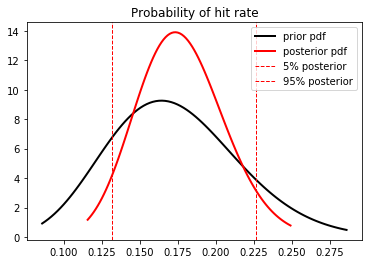

In [23]:
f, ax1 = plt.subplots()

ax1.plot(x, beta.pdf(x, a, b),
         'k-', lw=2, alpha=1, label='prior pdf')

x_post = np.linspace(beta.ppf(0.01, a_post, b_post),
                beta.ppf(0.99, a_post, b_post), 100)
ax1.plot(x_post, beta.pdf(x_post, a_post, b_post),
         'r-', lw=2, alpha=1, label='posterior pdf')
ax1.axvline(0.13198161, ymax=1, color='red', linestyle='dashed', lw=1, label='5% posterior')
ax1.axvline(0.22650857, ymax=1, color='red', linestyle='dashed', lw=1, label='95% posterior')

ax1.legend()
ax1.set_title('Probability of hit rate');

In [130]:
beta.pdf(x_post, a_post, b_post)

array([ 1.1732068 ,  1.33433235,  1.51108392,  1.70406715,  1.91379533,
        2.1406754 ,  2.3849944 ,  2.64690691,  2.92642349,  3.22340062,
        3.53753215,  3.8683427 ,  4.21518305,  4.5772277 ,  4.95347479,
        5.34274843,  5.74370337,  6.15483225,  6.57447509,  7.00083114,
        7.43197289,  7.86586196,  8.30036687,  8.73328224,  9.16234924,
        9.58527706,  9.99976489, 10.40352438, 10.79430195, 11.16990088,
       11.52820274, 11.86718788, 12.18495473, 12.47973761, 12.74992294,
       12.99406344, 13.21089042, 13.39932379, 13.55847995, 13.68767721,
       13.78643908, 13.85449504, 13.8917793 , 13.8984272 , 13.87476969,
       13.82132586, 13.7387937 , 13.62803934, 13.49008492, 13.32609523,
       13.13736348, 12.92529626, 12.69139804, 12.43725531, 12.1645206 ,
       11.87489662, 11.57012067, 11.2519494 , 10.92214427, 10.58245764,
       10.23461974,  9.88032651,  9.52122859,  9.1589212 ,  8.79493528,
        8.43072974,  8.06768481,  7.70709657,  7.35017264,  6.99

## Connecting with Bertrand's box paradox

The easiest parameters to plug in is the probability that the hitter, in the absence of any condition (without knowing anything else), is from the T10 group. We were given that explicitly in the problem:

$\text{P}(\text{T10})$ = 0.60

Note that this is analogous to $\text{P}(\text{box A})$ in Bertrand's box problem. In that problem, we knew the value implicitly ($\frac{1}{3}$) since the drawer was chosen at random.

The other parameters of the baseball question are less obvious to determine, but we can get some clues after  translating back to words. Let's start with $\text{P}(\text{18H})$. This is equivalent to ${\text{P}(\text{gold coin})}$ in Bertrand's box paradox. In the box problem, we broke this down by summing up the probabilities for a gold coin for each drawer. Here, we would sum up the probabilities of a hitter getting 18 hits in 100 at-bats if he is in the T10 group and in the T25 group.

${\text{P}(\text{18H})}$ = $\text{P}(\text{18H} | \text{T10})$ + $\text{P}(\text{18H} | \text{T25})$

$\text{P}(\text{18H} | \text{T10})$ is asking "What is the probability of getting 18 hits in 100 at-bats, given that they have a true talent level of 10% hit rate?" $\text{P}(\text{18H} | \text{T25})$ is basically the same question but for the T25 group. Here is where we need to recognize that this is an application of the [binomial distribution](https://www.khanacademy.org/math/ap-statistics/random-variables-ap/binomial-random-variable/a/binomial-probability-basic). Let's digress briefly.

## Application of the binomial distribution

This problem fits the binomial assumptions:
1. **Two outcomes**: For each plate appearance, we care that he is getting a hit (1) or no hit (0).
2. **Constant p**: The probability *p* getting a success has the same value, for each trial. This would be 0.10 for the group that has a 10% hit rate true talent level and 0.25 for the T25 group.
3. **Independence**: This is the one assumption that may be potentially violated since a hitter's confidence may fluctuate based on recent performance. However, in this situation I think it is okay to assume at-bats are largely independent of each other.

The probability mass function is:
$\text{P}(X = k) = \binom n k p^k(1-p)^{n-k}$

where:
$\binom n k = \frac{n!}{(n-k)!k!}$ (the binomial coefficient).

In this problem, k = 18 and n = 100. And as mentioned above, the T10 group has p = 0.10 while T25 has p of 0.25. We can start plugging values in. However, this visual may also help see what is going on.

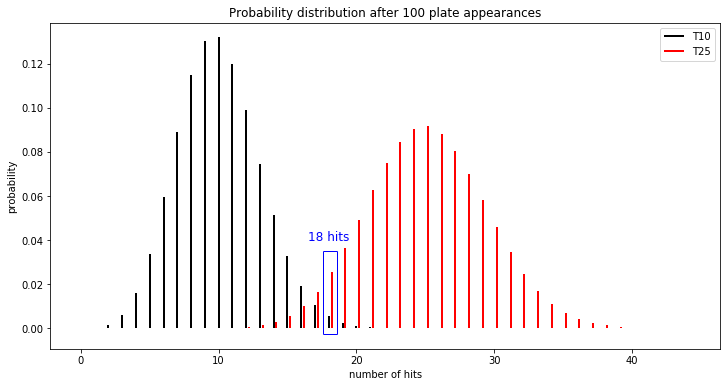

In [10]:
from scipy.stats import binom

# T10 group
n, p = 100, 0.1
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
rv = binom(n, p)
x = np.arange(0, 45)
ax.vlines(x, 0, rv.pmf(x), colors="k", linestyles="-", lw=2, label="T10")

# T25 group
n25, p25 = 100, 0.25
rv25 = binom(n25, p25)
x25 = np.arange(0, 45)
ax.vlines(x25 + 0.2, 0, rv25.pmf(x25), colors="r", linestyles="-", lw=2, label="T25")

# Formatting
ax.set_ylabel("probability")
ax.set_xlabel("number of hits")
ax.set_title("Probability distribution after 100 plate appearances")

# Box around 18 hits
ax.text(16.5, 0.04, '18 hits', color='b', fontsize=12);
ax.vlines(17.6, -0.0025, 0.035, colors="blue", linestyles="-", lw=1)
ax.vlines(18.6, -0.0025, 0.035, colors="blue", linestyles="-", lw=1)
ax.hlines(0.035, 17.6, 18.6, colors="blue", linestyles="-", lw=1)
ax.hlines(-0.0025, 17.6, 18.6, colors="blue", linestyles="-", lw=1)
ax.legend();

In [15]:
x[18]

18

0.2427979687828124

In [ ]:
p

We can see that each true talent level group has its own probability distribution for different hits a hitter would get in 100 at-bats. Not surprisingly, the number of hits containing the highest probability for the respective groups are its true talent hit rate for 100 at-bats. In other words, we see 10 hits as being most probable in the T10 group and 25 hits as most probable in the T25 group.

Another observation you might make is that the T10 group has a tighter variance than the T25 group. This is a property of the binomial distribution, where variance is equal to $np \times (1-p)$. You can see that proportions that are closer to 0 or closer to 1, will have less variance than a proportion closer to the middle. (The Bernoulli distribution, which is just one trial of a binomial distribution, shows a similar property, something I wrote about in a [previous post](
https://benslack19.github.io/The-Bernoulli-distribution/#understanding-the-relationship-between-probability-and-variance).)

The height of the black and red lines at 18 hits should add up to 1, but weighted by what we know about the two groups of baseball hitters (our "priors"). If we were to use the graph above, the probability of getting 18 hits in 100 at-bats, given that they have a true talent level of 10% hit rate would be:
<br>

$\text{P}(\text{T10} | \text{18H}) = \frac{\text{height of black line at 18 hits} \times 0.6}{\text{height of black line at 18 hits} \times 0.6 + \text{height of red line at 18 hits} \times 0.4}$

## Putting it all together

Let's return to the parameters of the Bayes' theorem equation and start bringing the pieces together.

${\text{P}(\text{18H})}$ = $\text{P}(\text{18H} | \text{T10})$ + $\text{P}(\text{18H} | \text{T25})$

We can apply the probability mass function starting first with the T10 group. (Note that we can ignore calculation of the binomial coefficient since this will cancel out in the final equation. I'll use the term $\propto$ to represent "in proportion to." in the equations below.)

$\text{P}(\text{18H} | \text{T10}) \propto (0.1^{18} \times 0.9^{82}) $

$\text{P}(\text{18H} | \text{T25}) \propto (0.25^{18} \times 0.75^{82}) $

We now have everything we need to plug into our equation.


$\text{P}(\text{T10} | \text{18H}) = \frac{\text{P}(\text{18H} | \text{T10})\text{P}(\text{T10})}{\text{P}(\text{18H})}$

$\text{P}(\text{T10} | \text{18H}) = \frac{(0.1^{18} \times 0.9^{82}) \times 0.6}{(0.1^{18} \times 0.9^{82}) \times 0.6 + (0.25^{18} \times 0.75^{82}) \times 0.4} $


After all that math, we have (drumroll) $\text{P}(\text{T10} | \text{18H}) = 0.243$.

Therefore, there is 24.3% probability that Aguila has a true talent level of a 10% hit rate.


The baseball example is also the diachronic interpretation** of Bayes' theorem, which is a fancy way of saying that the hypothesis can be updated with time (in this case, after 100 plate appearances).